**Definição do problema**


Boston House-Price Dataset contém informações sobre moradias na área de Massachusetts Mass. 

O objetivo é prever os preços de casas em Boston a partir das informações fornecidas pelo conjunto de dados.



**Descrição das variáveis:**<br>
- **crim**: é a taxa de criminalidade per capita na área do imóvel;<br>
- **zn**: é a proporção de terrenos residenciais divididos por lotes acima de 25.000 pés quadrados;<br>
- **indus**: é a proporção de acres não comerciais na área do imóvel;<br>
- **chas**: se a casa limita ou não o Rio Charles<br>
- **nox**: é a concentração de óxidos nítricos (partes por 10 milhões);<br>
- **rm**: é o número médio de quartos por habitação;<br>
- **age**: é a proporção de unidades ocupadas pelos proprietários construídas antes de 1940;<br>
- **dis**: é a distância ponderada de cinco centros de trabalho em Boston;<br>
- **rad**: é o índice de acessibilidade às rodovias radiais;<br>
- **tax**: é a taxa de imposto sobre a propriedade em US 10.000;<br>
- **ptratio**: é a proporção aluno-professor na área do imóvel;<br>
- **bk**: é um cálculo referente a esta equação 1000 (Bk - 0,63) ^ 2;<br>
- **lstat**: é a porcentagem da população de baixa renda e;<br>
- **medv (variável alvo)**: é a mediana do valor das casas<br>


**Endereço do conjunto de dados:**

https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset/input<br>

**Importando as bibliotecas**

In [1]:
# Manipulação e exploração do conjunto de dados
import pandas as pd
import numpy as np

# Cálculos matemáticos
import math

# Plotagem de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold

# Algoritmos de Regressão
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_absolute_error, r2_score

# Cross Validation
from sklearn.model_selection import cross_val_score 

# Dividir dados de treino e teste
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')


**Carregando os dados**

In [2]:
df = pd.read_csv(r"C:\Users\User\OneDrive\Área de Trabalho\boston.csv", encoding='utf8')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
# Separando a variável alvo
variavelAlvo = "MEDV"

**Visualizando informações sobre o dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


**Sumário Estátistico**

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
if 'index' in df.columns:
    df.drop(['index'], axis=1, inplace=True)

**Tratando valores nulos**

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**Tratando dados duplicados**

In [8]:
# Verificando se existem dados duplicados.
df.duplicated().sum()

0

In [9]:
# Excluindo as linhas duplicadas mantendo a primeira ocorrência da linha

df.drop_duplicates(ignore_index=True, inplace = True)

In [10]:
# Verificando a quantidade de valores únicos
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [11]:
# Função para plotar um histograma
def desenhaHistograma(coluna, variavelAnalisada):

    # Calculando a quantidade de classes da variável analisada
    n = coluna.count()
    k = round(1+3.3*math.log10(n))
   
    # Calculando o intervalo de cada classe
    frequencias, intervalos = np.histogram(coluna, bins = k)

    # Desenhando o gráfico
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.histplot(coluna, bins=k, kde=True)
    ax.set_title("Histograma da variável " + variavelAnalisada, fontsize = 16)
    ax.set_xlabel(variavelAnalisada, fontsize = 12)
    ax.set_ylabel("Frequência", fontsize = 12)
    ax.set_xticks(intervalos) 
    for barras in ax.containers:
        ax.bar_label(barras)
    plt.show()

In [12]:
def desenhaCountPlot(coluna, variavelAnalisada):
    
    # Desenhando o gráfico
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.countplot(x=coluna, palette=("Pastel1"),  order = coluna.value_counts().index)
    ax.set_title("Frequência absoluta da variável " + variavelAnalisada, fontsize = 16)
    for barras in ax.containers:
        ax.bar_label(barras)
    plt.show()

In [13]:
# Função para plotar um Scatter Plot
def desenhaScatterPlot(colunaX, colunaY, variavelAnalisadaX, variavelAnalisadaY):

    fig = plt.subplots(figsize=(13, 6))
    ax = sns.scatterplot(x=colunaX, y=colunaY)
    ax.set_title("Relação da variável " + variavelAnalisadaX + " com a variável " + variavelAnalisadaY, fontsize = 16)
    ax.set_xlabel(variavelAnalisadaX, fontsize = 12)
    ax.set_ylabel(variavelAnalisadaY, fontsize = 12)


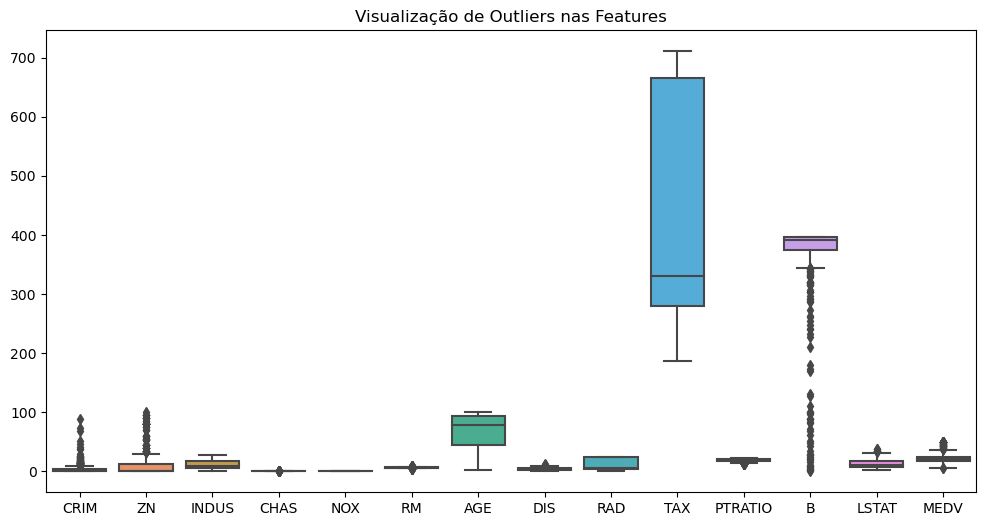

In [29]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df)

plt.title('Visualização de Outliers nas Features')

plt.show()

In [89]:
def remove_outliers(df, cols):
    
      for col in cols:

        Q1 = df[col].quantile(0.25)

        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        df = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]

        return df

In [93]:
# Selecionar todas as colunas numéricas
colunas_numericas = df.select_dtypes(include=['number']).columns

In [94]:
# Remover outliers de todas as colunas numéricas
df_sem_outliers = remove_outliers(df, colunas_numericas)

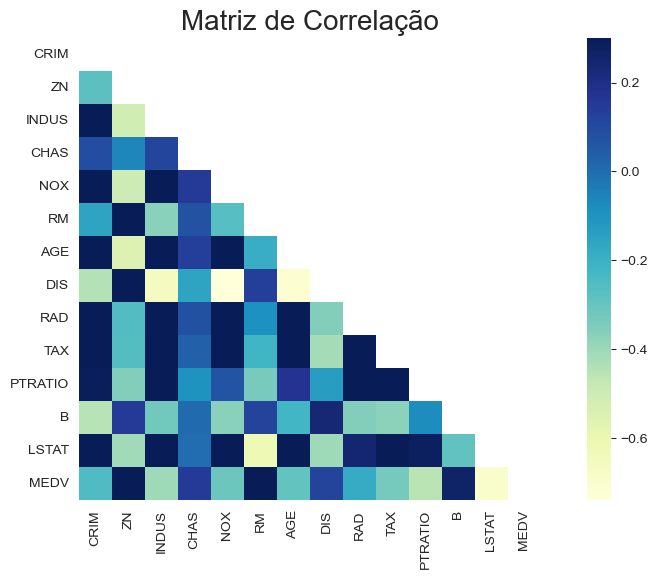

In [43]:
#Plotando o gráfico de correlação 
corr = df_sem_outliers.corr()

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True


with sns.axes_style("white"):
    fig = plt.subplots(figsize=(12, 6))   
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap="YlGnBu")
    plt.title('Matriz de Correlação', fontsize='20')
    plt.show()



**Correlação entre a variável RM e a variável alvo**

O gráfico de dispersão, entre o número médio de quartos e o valor das casas, mostra uma correlação positiva. Isso indica que o número de quartos está associado ao aumento no valor das casas.

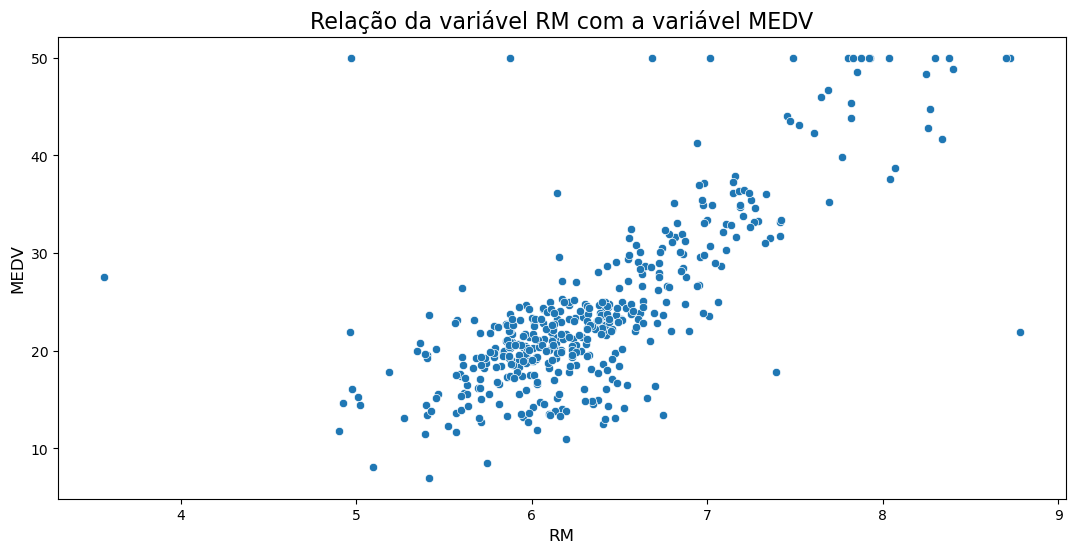

In [44]:
# ScatterPlot
desenhaScatterPlot(df_sem_outliers.RM, df.MEDV, "RM","MEDV" )

**Correlação entre a variável LSTAT e a variável alvo**

O gráfico de dispersão, entra a porcentagem da população de baixa renda e o valor da mediana das casas, podemos observar uma correlação negativa. Isso indica que áreas com maior proporção de população de baixa renda tendem a ter casas com valores menores.

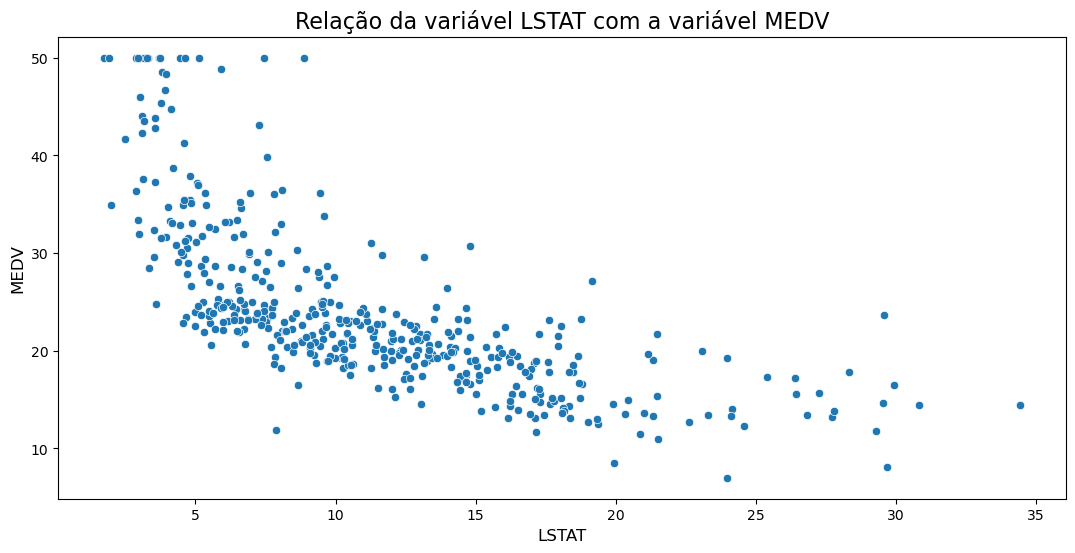

In [45]:
# ScatterPlot
desenhaScatterPlot(df_sem_outliers.LSTAT, df_sem_outliers.MEDV, "LSTAT","MEDV" )

A váriavel CHAS indicam se o imóvel está próximo ao Rio Charles. 

O número 1 indica que a áera do imóvel limita o rio
O número 0, não limita o rio

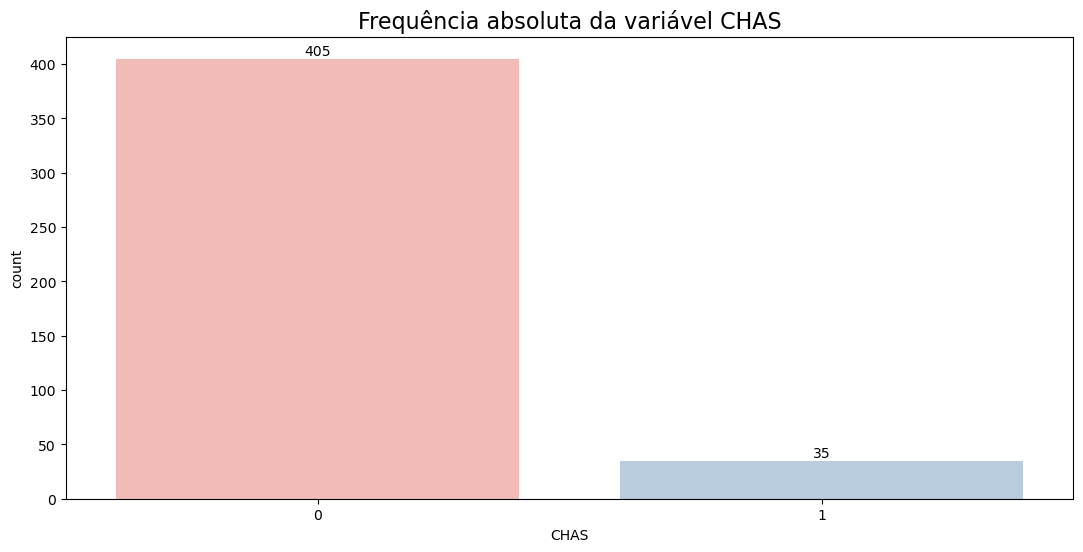

In [46]:
# CountPlot da variável CHAS
desenhaCountPlot(df_sem_outliers.CHAS, "CHAS")

Ao análisar o histrograma da variável alvo, podemos perceber que a mediana dos valores das casa está dentro da maioria da distribuição dos dados.

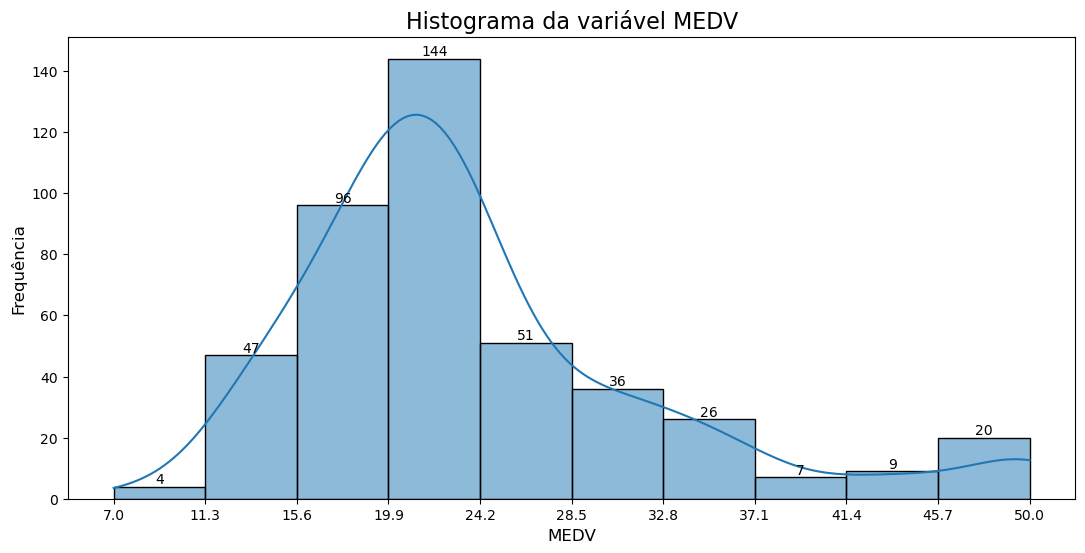

In [47]:
# Frequência absoluta 
desenhaHistograma(df_sem_outliers[variavelAlvo], variavelAlvo)

In [48]:
# Faz uma cópia do dataframe
dfDados = df_sem_outliers.copy()
dfDados

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [49]:
#Separando váriavel resposta do DataFrame
x = dfDados[dfDados.columns[0:13]].values
y = dfDados['MEDV'].values

In [50]:
#StandScaler para retirar a sensibilidade dos algoritmos

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [54]:
#Separando os dados de Treino e Teste.
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size = 0.3, random_state = 42)

In [52]:
#Função CrossValidation
def CrossValidation(modelo):

    numeroFolds = 5

    kfold = KFold(n_splits=numeroFolds, shuffle= True, random_state= 42)
 
    cross_validation = cross_val_score(modelo, x_scaled, y, cv=kfold, scoring="r2")

    media = cross_validation.mean()*100
    
    return media


In [55]:
#Função para treinar os modelos
def TreinandoModelo(modelo):
    rl = modelo()
    rl.fit(X_train, y_train)
    predicao = rl.predict(X_test)

    return predicao

In [56]:
#Função para plotar ScatterPlot
def grafico(y_train, pred, TituloModelo):
    fig = plt.subplots(figsize=(13, 6))
    plt.scatter(y_train, pred)
    plt.xlabel("Predição")
    plt.ylabel("Variavel Treino")
    plt.title(TituloModelo, fontsize = 16)

    return plt.show()

In [26]:
#Função para o erro absoluto.
def ErroAbsoluto(y_test, predicao):
    
    mae = mean_absolute_error(y_test, predicao)

    return mae

In [27]:
modelosutilizados = pd.DataFrame({
    
    "Modelos": ["LinearRegression", "RandomForestRegressor", "GradientBoostingRegressor", "KNeighborsRegressor", "AdaBoostRegressor"]})

modelosutilizados

,Modelos
0,LinearRegression
1,RandomForestRegressor
2,GradientBoostingRegressor
3,KNeighborsRegressor
4,AdaBoostRegressor


**Linear Regression**

In [59]:
Media1 = CrossValidation(LinearRegression())
Error1 = ErroAbsoluto(y_test, pred)
print(f"Media R2 Score: {Media1:.2f}")
print(f"Erro Médio Absoluto: {Error1:.2f}")


Media R2 Score: 70.54
Erro Médio Absoluto: 2.89


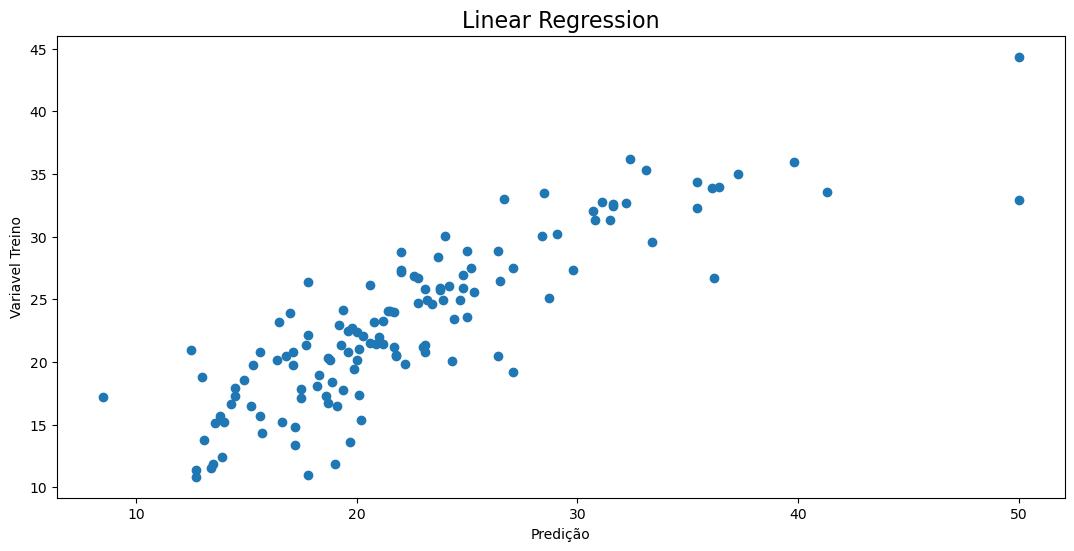

In [58]:
pred = TreinandoModelo(LinearRegression)
grafico(y_test, pred, "Linear Regression")

**Random Forest Regressor**

In [62]:
Media2 = CrossValidation(RandomForestRegressor())
Error2 = ErroAbsoluto(y_test, pred2)
print(f"Media R2 Score: {Media2:.2f}")
print(f"Erro Médio Absoluto: {Error2:.2f}")


Media R2 Score: 82.31
Erro Médio Absoluto: 2.13


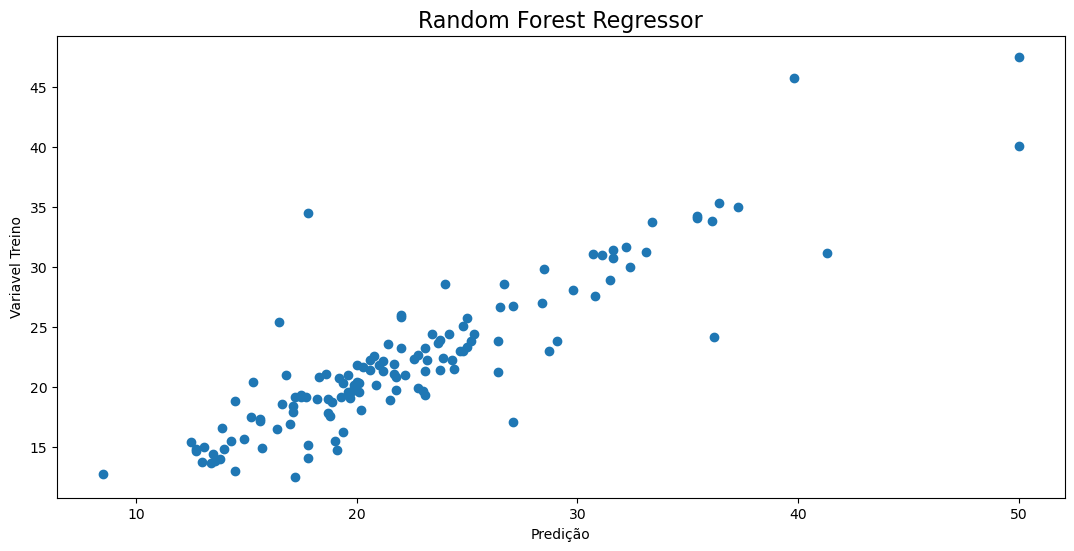

In [60]:
pred2 = TreinandoModelo(RandomForestRegressor)

grafico(y_test, pred2, "Random Forest Regressor")

**Gradient Boosting Regressor**

In [67]:
Media3 = CrossValidation(GradientBoostingRegressor())
Error3 = ErroAbsoluto(y_test, pred3)
print(f"Media R2 Score: {Media3:.2f}")
print(f"Erro Médio Absoluto: {Error3:.2f}")

Media R2 Score: 85.33
Erro Médio Absoluto: 2.03


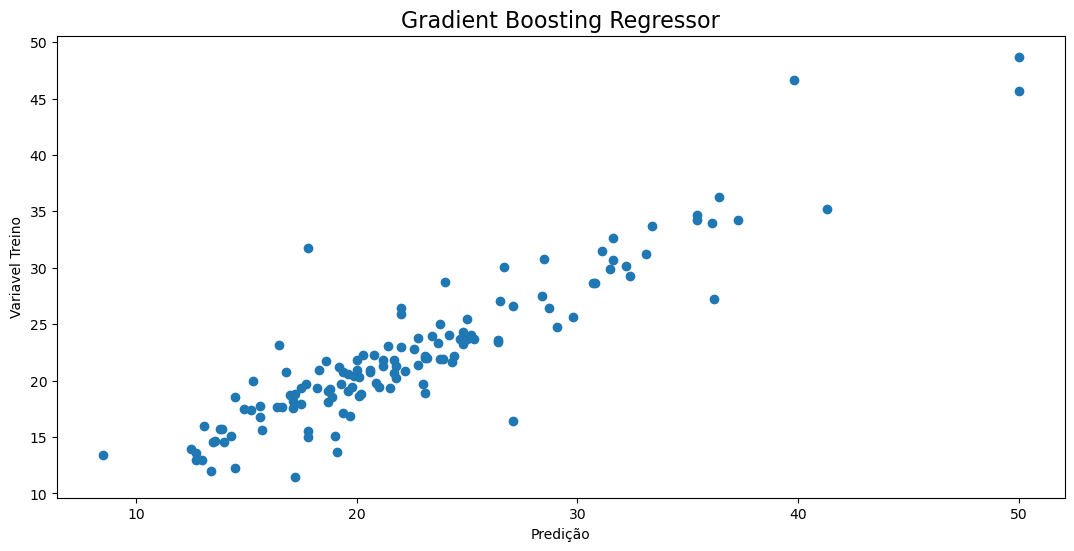

In [66]:
pred3 = TreinandoModelo(GradientBoostingRegressor)
grafico(y_test, pred3, 'Gradient Boosting Regressor')

In [70]:
Media4 = CrossValidation(AdaBoostRegressor())
Error4 = ErroAbsoluto(y_test, pred4)
print(f"Media R2 Score: {Media4:.2f}")
print(f"Erro Médio Absoluto: {Error4:.2f}")

Media R2 Score: 80.91
Erro Médio Absoluto: 2.32


**Ada Boost Regressor**

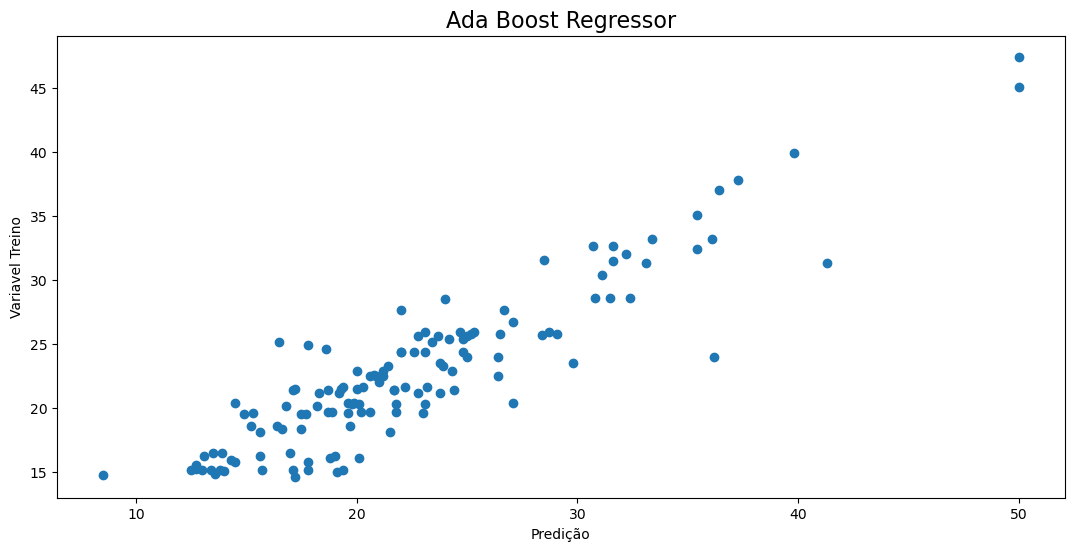

In [69]:
pred4 = TreinandoModelo(AdaBoostRegressor)
grafico(y_test, pred4, "Ada Boost Regressor")

**K Neighbors Regressor**

In [72]:
Media5 = CrossValidation(KNeighborsRegressor())
Error5 = ErroAbsoluto(y_test, pred5)
print(f"Media R2 Score: {Media5:.2f}")
print(f"Erro Médio Absoluto: {Error5:.2f}")

Media R2 Score: 72.46
Erro Médio Absoluto: 2.59


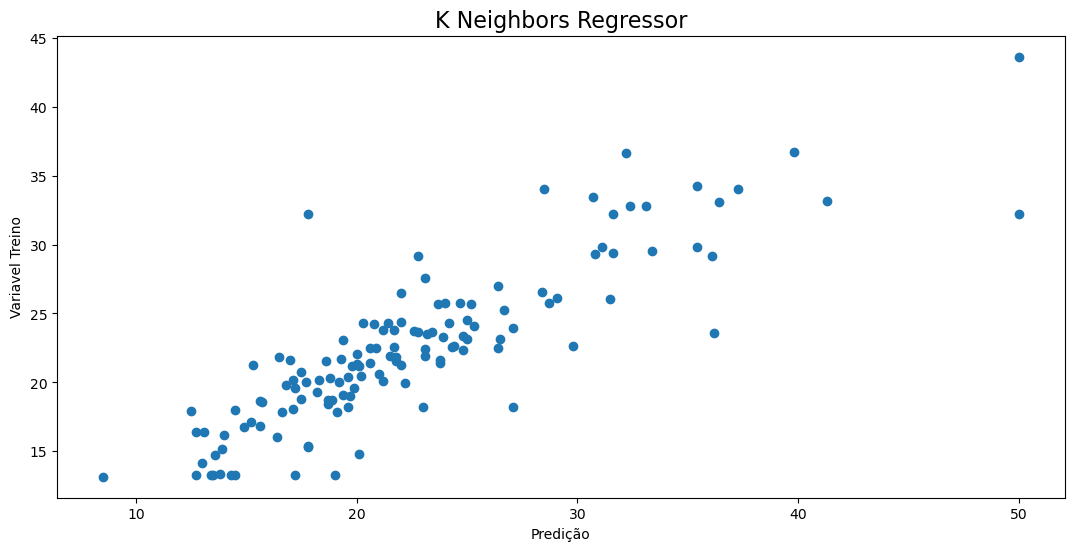

In [71]:
pred5 = TreinandoModelo(KNeighborsRegressor)
grafico(y_test, pred5, "K Neighbors Regressor")

**Avaliação e comparação de todos os modelos**


In [74]:
lista = pd.DataFrame({
    
    "Modelos": ["LinearRegression", "RandomForestRegressor", "GradientBoostingRegressor", "KNeighborsRegressor", "AdaBoostRegressor"],

    "Media do R2": [Media1, Media2, Media3, Media4, Media5],

    "Erro Médio Absoluto": [Error1, Error2, Error3, Error4, Error5]
})

lista.sort_values(by="Media do R2", ascending=False)


,Modelos,Media do R2,Erro Médio Absoluto
2,GradientBoostingRegressor,85.327846,2.025225
1,RandomForestRegressor,82.308100,2.125439
3,KNeighborsRegressor,80.914984,2.318401
4,AdaBoostRegressor,72.462603,2.585758
0,LinearRegression,70.539880,2.892043


Text(0.5, 1.0, 'Análise conjunta dos Modelos')

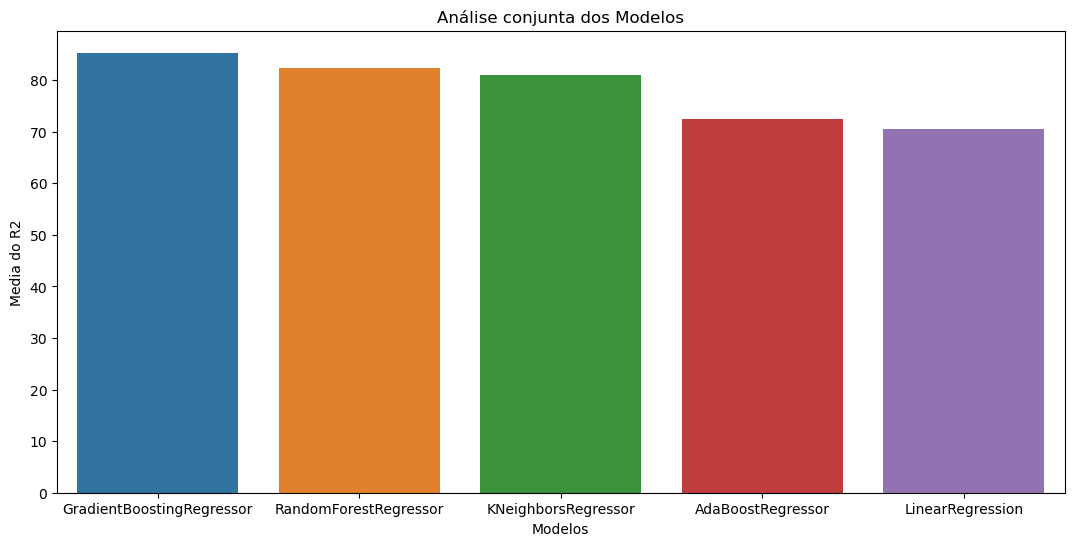

In [75]:
plt.figure(figsize=(13,6))
sns.barplot(data=lista.sort_values('Media do R2', ascending=False), x='Modelos', y='Media do R2', ci=False)
plt.title("Análise conjunta dos Modelos")